In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
#loading model
(x_train,y_train),(x_test,y_test)=mnist.load_data() #28x28 images

#normalizing between 0,1 instead of the given numbers 0-255 for easiert calculation
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

#defining the model
model = tf.keras.models.Sequential() #several levels of neurons
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #instead of 28x28, we have only 1 input layer
#first hidden layer, with 128 units/ neuros, step up/signal function called with
#activation of the function with relu(rectified linear) (?algorithm?)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #second hidden layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #output function with 10 categories
                                                              #with softmax for probability distribution

# defining parameters for the training of the model
# neural network always tries to minimize the loss (degree of error)
# instead of optimizing the accuracy
# optimizer is the most important part of a neural network, adam is a go to optimizer
# otheres are gradienet descent (stochastic) and other algorithms
# loss calculation with sparcse cat crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#trains the model with .fit method with 3 runs defined by epochs
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2693 - accuracy: 0.9196
Epoch 2/3
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1108 - accuracy: 0.9654
Epoch 3/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0750 - accuracy: 0.9764


In [5]:
val_loss, val_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0857 - accuracy: 0.9739


In [6]:
model.compile

<bound method Model.compile of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000016A427FF4C8>>

In [7]:
import matplotlib.pyplot as plt

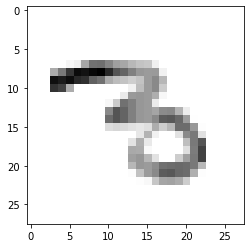

In [8]:
plt.imshow(x_train[30], cmap=plt.cm.binary)
plt.show()

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
#save and load the finished model
model.save('num_reader.model')
new_model=tf.keras.models.load_model('num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader.model\assets


In [11]:
predictions = new_model.predict([x_test])

In [12]:
predictions

array([[1.60303115e-09, 3.40684245e-08, 1.86156547e-06, ...,
        9.99994278e-01, 1.67164949e-08, 9.33693443e-08],
       [1.49077106e-08, 9.84170940e-04, 9.98983681e-01, ...,
        2.20363692e-08, 7.17162507e-08, 4.68798958e-11],
       [5.04980449e-07, 9.99866247e-01, 4.31125818e-06, ...,
        2.13382173e-05, 8.24139061e-05, 3.81898781e-06],
       ...,
       [6.71044909e-09, 9.15011583e-07, 3.19572067e-08, ...,
        7.00817473e-05, 2.78527011e-07, 1.02871134e-04],
       [2.29501575e-06, 4.89777221e-07, 5.09483762e-08, ...,
        7.87437330e-06, 1.28270098e-04, 1.35483678e-08],
       [7.24748361e-07, 1.03286531e-07, 2.93928849e-07, ...,
        8.83446719e-11, 8.23082615e-08, 9.75703873e-09]], dtype=float32)

In [13]:
import numpy as np
print(np.argmax(predictions[7]))

9


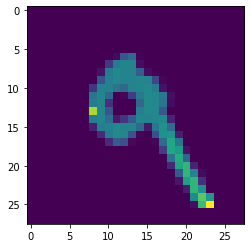

In [14]:
plt.imshow(x_test[7])
plt.show()